## Regression: Predict Fuel Efficiency of a Vehicle

### Task
- Given information about a car such as horsepower, cylinders, and weight...
- Predict miles per gallon, a measure of its fuel efficiency.

### Dataset
- https://archive.ics.uci.edu/ml/datasets/auto+mpg
- Multivariate = more than 1 FEATURE / attribute / input
- Instances: 398 (very small)
- Attribute Characteristics:
    Categorical: fixed number of values [0, 1], [0, 1, 2], [2, 3, 4]
    Real: real number
- Number of Attributes: 8
- Missing Values? Yes (may need to dropna, or interpolate)

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [77]:
df = pd.read_csv('../../data/auto-mpg/auto-mpg.data.txt', sep='\s+',
                names=['mpg', 'cylinders', 'displacement',
                       'horsepower', 'weight', 'acceleration', 'model_year',
                       'origin', 'car_name'],
                header=None,
                na_values=['?'])

# Attribute Information:
#    1. mpg:           continuous
#    2. cylinders:     multi-valued discrete
#    3. displacement:  continuous
#    4. horsepower:    continuous
#    5. weight:        continuous
#    6. acceleration:  continuous
#    7. model year:    multi-valued discrete
#    8. origin:        multi-valued discrete
#    9. car name:      string (mostly unique for each instance)

# axis=1 drop columns
# axis=0 [default] drop rows
# inplace=True changes original df
# inplace=False returns a copy of the df
df.drop(['car_name'], axis=1, inplace=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


## Data Cleaning

In [79]:
# One way to print na rows
df[df.isna().values]

# df.isna().values returns a mask
# apply mask to original dataframe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [40]:
# NaN values

# - drop  =>  dropna()
# - interpolate => interpolate()
# - fill with same value (mean, median, ...) => fillna()

In [41]:
index = df[df.isna().values].index

# original
df.iloc[index] # iloc integer column, else use loc 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [42]:
df1 = df.dropna()

# KeyError: "None of [Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')] are in the [index]"
# df1.loc[index] # rows are gone!!!

In [43]:
df2 = df.interpolate()
df2.iloc[index] # linear interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
126,21.0,6,200.0,97.5,2875.0,17.0,74,1
330,40.9,4,85.0,67.0,1835.0,17.3,80,2
336,23.6,4,140.0,80.0,2905.0,14.3,80,1
354,34.5,4,100.0,74.5,2320.0,15.8,81,2
374,23.0,4,151.0,83.0,3035.0,20.5,82,1


In [44]:
df2.iloc[30:35] # see the interpolation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
30,28.0,4,140.0,90.0,2264.0,15.5,71,1
31,25.0,4,113.0,95.0,2228.0,14.0,71,3
32,25.0,4,98.0,97.5,2046.0,19.0,71,1
33,19.0,6,232.0,100.0,2634.0,13.0,71,1
34,16.0,6,225.0,105.0,3439.0,15.5,71,1


In [45]:
import numpy as np
df3 = df.fillna(np.mean(df.horsepower))
df3.iloc[index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
32,25.0,4,98.0,104.469388,2046.0,19.0,71,1
126,21.0,6,200.0,104.469388,2875.0,17.0,74,1
330,40.9,4,85.0,104.469388,1835.0,17.3,80,2
336,23.6,4,140.0,104.469388,2905.0,14.3,80,1
354,34.5,4,100.0,104.469388,2320.0,15.8,81,2
374,23.0,4,151.0,104.469388,3035.0,20.5,82,1


In [46]:
# Drop NaN values because horsepower interpolation between different
# car models requires work (future enhancement)

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


## Data Exploration

In [47]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


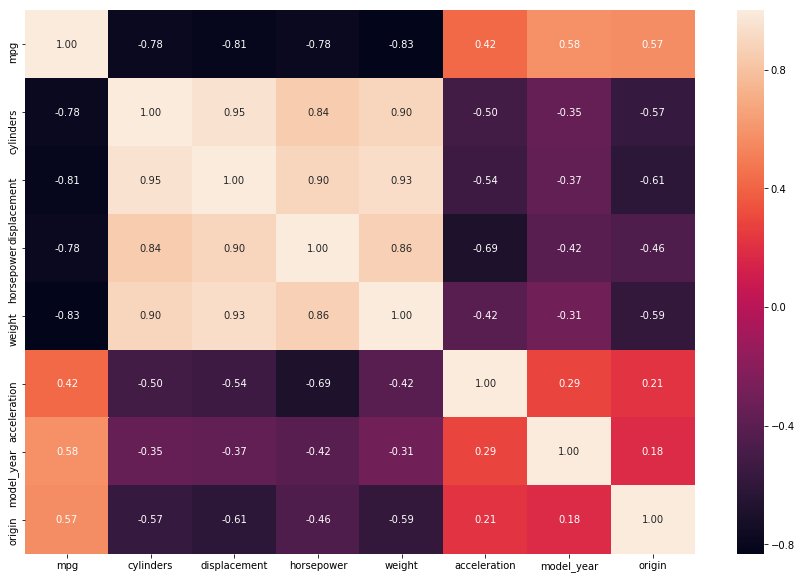

In [48]:
# another way to plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.2f')

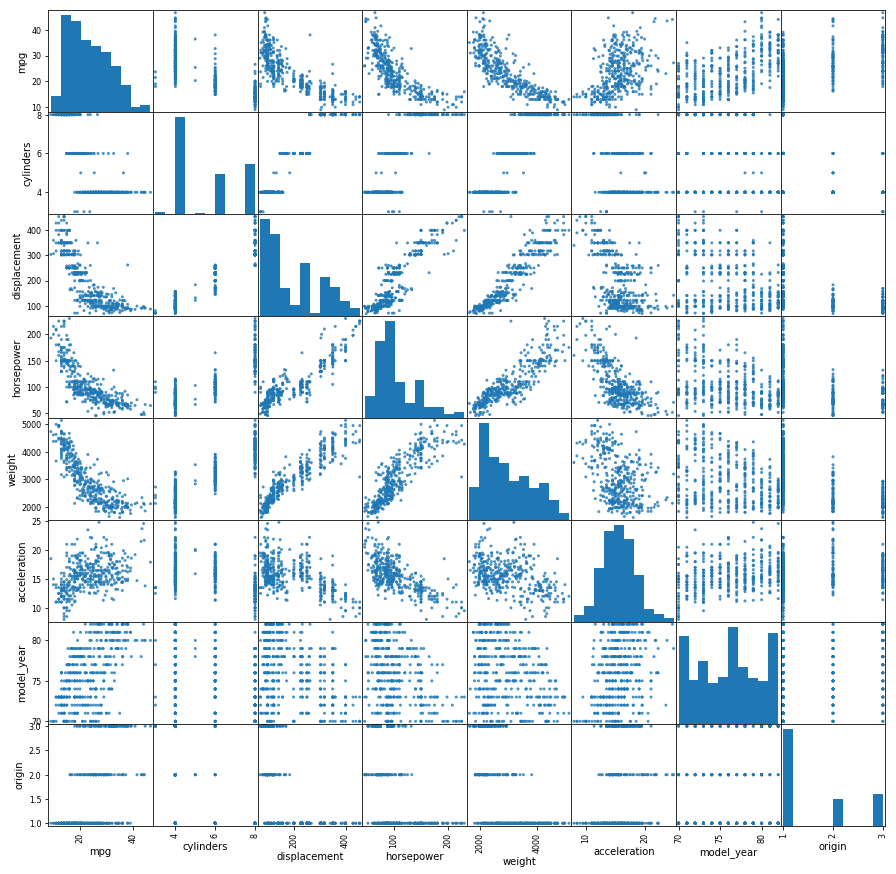

In [49]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.8, figsize=(15, 15))
plt.show()

In [50]:
# feature selection

# select cylinders to model_year
# loc[row_selector, col_selector]
X = df.loc[:, 'cylinders':'model_year'] # contiguous columns
y = df.mpg

X.columns # verify columns are correct

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [51]:
# Example: non-contiguous columns (skip something in middle)
# skip mpg, weight, origin
df.loc[:, (df.columns != 'mpg') & (df.columns != 'weight') & (df.columns != 'origin')]

,cylinders,displacement,horsepower,acceleration,model_year
0,8,307.0,130.0,12.0,70
1,8,350.0,165.0,11.5,70
2,8,318.0,150.0,11.0,70
3,8,304.0,150.0,12.0,70
4,8,302.0,140.0,10.5,70
5,8,429.0,198.0,10.0,70
6,8,454.0,220.0,9.0,70
7,8,440.0,215.0,8.5,70
8,8,455.0,225.0,10.0,70
9,8,390.0,190.0,8.5,70


## Feature Scaling

We will perform feature scaling.

Before features can be scaled, we need to holdout (separate out) the test dataset from the training dataset. 

In [52]:
# Train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # split 75/25

In [53]:
print(X_test.shape)

(98, 6)


In [55]:
# Scale X_train, X_test, y_train, y_test
from sklearn.preprocessing import StandardScaler

# Scaling both so that Mean Squared Error / Cost computes small numbers
# (better for training)
X_scaler = StandardScaler()
y_scaler = StandardScaler()

# initialise and transform y_train
# reshape vector: from (294,) to (294, 1)
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

X_train_scaled = X_scaler.fit_transform(X_train) # (294, 6) ok (matrix)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


## Train Model

Let's try training a Linear Regression model, using Stochastic Gradient Descent.

We will perform cross-validation here as well, and plot the learning curve to see how our training went.

In [56]:
from sklearn.linear_model import SGDRegressor

# Stochastic Gradient Descent Regressor
model = SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                     eta0=0.001, learning_rate='invscaling')
    
model.fit(X_train_scaled, y_train_scaled.ravel()) # fit / train
model.score(X_test_scaled, y_test_scaled.ravel()) # evaluate with test set

-- Epoch 1
Norm: 0.13, NNZs: 6, Bias: 0.000436, T: 294, Avg. loss: 0.377156
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 6, Bias: 0.000457, T: 588, Avg. loss: 0.261912
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.25, NNZs: 6, Bias: 0.000441, T: 882, Avg. loss: 0.208425
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.28, NNZs: 6, Bias: 0.000358, T: 1176, Avg. loss: 0.178347
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.31, NNZs: 6, Bias: 0.000309, T: 1470, Avg. loss: 0.160037
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.33, NNZs: 6, Bias: 0.000315, T: 1764, Avg. loss: 0.148166
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.35, NNZs: 6, Bias: 0.000302, T: 2058, Avg. loss: 0.140144
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.36, NNZs: 6, Bias: 0.000292, T: 2352, Avg. loss: 0.134497
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.37, NNZs: 6, Bias: 0.000317, T: 2646, Avg. loss: 0.130428
Total training time: 0.00 seco

0.7664257627010148

In [57]:
print(model.score(X_test_scaled, y_test_scaled))
print(model.coef_)
print(model.intercept_)

0.7664257627010148
[-0.15513568 -0.17881954 -0.15609266 -0.28184298 -0.02956909  0.27798363]
[8.66613254e-05]


In [58]:
from sklearn.model_selection import learning_curve

train_sizes_abs, train_scores, val_scores = learning_curve(
    SGDRegressor(random_state=42, verbose=True, tol=1e-4, max_iter=100,
                 learning_rate='constant', eta0=1e-4), # default is 0.01
    X_train_scaled, y_train_scaled.ravel(),
    cv=10,
    random_state=42,
    verbose=True)

[learning_curve] Training set sizes: [ 26  85 145 204 264]
-- Epoch 1
Norm: 0.00, NNZs: 6, Bias: -0.000206, T: 26, Avg. loss: 0.422346
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 6, Bias: -0.000412, T: 52, Avg. loss: 0.416554
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 6, Bias: -0.000619, T: 78, Avg. loss: 0.410889
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.02, NNZs: 6, Bias: -0.000824, T: 104, Avg. loss: 0.405344
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.02, NNZs: 6, Bias: -0.001032, T: 130, Avg. loss: 0.399921
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.02, NNZs: 6, Bias: -0.001239, T: 156, Avg. loss: 0.394611
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.03, NNZs: 6, Bias: -0.001448, T: 182, Avg. loss: 0.389415
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.03, NNZs: 6, Bias: -0.001656, T: 208, Avg. loss: 0.384329
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.03, NNZs: 6, Bias: -0.001865,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_grad

-- Epoch 1
Norm: 0.04, NNZs: 6, Bias: -0.001136, T: 204, Avg. loss: 0.478413
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 6, Bias: -0.002159, T: 408, Avg. loss: 0.420076
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.10, NNZs: 6, Bias: -0.003037, T: 612, Avg. loss: 0.371470
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.13, NNZs: 6, Bias: -0.003846, T: 816, Avg. loss: 0.330907
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.15, NNZs: 6, Bias: -0.004594, T: 1020, Avg. loss: 0.296985
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.17, NNZs: 6, Bias: -0.005245, T: 1224, Avg. loss: 0.268707
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.20, NNZs: 6, Bias: -0.005817, T: 1428, Avg. loss: 0.245083
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 0.21, NNZs: 6, Bias: -0.006307, T: 1632, Avg. loss: 0.225372
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 0.23, NNZs: 6, Bias: -0.006755, T: 1836, Avg. loss: 0.208910
Total training time: 0

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before conv

Total training time: 0.04 seconds.
-- Epoch 44
Norm: 0.42, NNZs: 6, Bias: -0.006615, T: 8976, Avg. loss: 0.120158
Total training time: 0.04 seconds.
-- Epoch 45
Norm: 0.42, NNZs: 6, Bias: -0.006639, T: 9180, Avg. loss: 0.119837
Total training time: 0.04 seconds.
-- Epoch 46
Norm: 0.42, NNZs: 6, Bias: -0.006662, T: 9384, Avg. loss: 0.119528
Total training time: 0.04 seconds.
-- Epoch 47
Norm: 0.42, NNZs: 6, Bias: -0.006695, T: 9588, Avg. loss: 0.119233
Total training time: 0.04 seconds.
-- Epoch 48
Norm: 0.42, NNZs: 6, Bias: -0.006724, T: 9792, Avg. loss: 0.118947
Total training time: 0.04 seconds.
-- Epoch 49
Norm: 0.43, NNZs: 6, Bias: -0.006752, T: 9996, Avg. loss: 0.118670
Total training time: 0.04 seconds.
-- Epoch 50
Norm: 0.43, NNZs: 6, Bias: -0.006786, T: 10200, Avg. loss: 0.118402
Total training time: 0.04 seconds.
-- Epoch 51
Norm: 0.43, NNZs: 6, Bias: -0.006813, T: 10404, Avg. loss: 0.118143
Total training time: 0.04 seconds.
-- Epoch 52
Norm: 0.43, NNZs: 6, Bias: -0.006844, T

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before conv


Norm: 0.15, NNZs: 6, Bias: 0.007263, T: 1170, Avg. loss: 0.271802
Total training time: 0.04 seconds.
-- Epoch 46
Norm: 0.16, NNZs: 6, Bias: 0.007352, T: 1196, Avg. loss: 0.268872
Total training time: 0.04 seconds.
-- Epoch 47
Norm: 0.16, NNZs: 6, Bias: 0.007438, T: 1222, Avg. loss: 0.265996
Total training time: 0.04 seconds.
-- Epoch 48
Norm: 0.16, NNZs: 6, Bias: 0.007522, T: 1248, Avg. loss: 0.263172
Total training time: 0.04 seconds.
-- Epoch 49
Norm: 0.16, NNZs: 6, Bias: 0.007602, T: 1274, Avg. loss: 0.260398
Total training time: 0.04 seconds.
-- Epoch 50
Norm: 0.17, NNZs: 6, Bias: 0.007680, T: 1300, Avg. loss: 0.257675
Total training time: 0.04 seconds.
-- Epoch 51
Norm: 0.17, NNZs: 6, Bias: 0.007755, T: 1326, Avg. loss: 0.255000
Total training time: 0.04 seconds.
-- Epoch 52
Norm: 0.17, NNZs: 6, Bias: 0.007829, T: 1352, Avg. loss: 0.252373
Total training time: 0.04 seconds.
-- Epoch 53
Norm: 0.18, NNZs: 6, Bias: 0.007900, T: 1378, Avg. loss: 0.249793
Total training time: 0.04 sec

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before conv

Norm: 0.41, NNZs: 6, Bias: -0.010005, T: 8364, Avg. loss: 0.121313
Total training time: 0.00 seconds.
-- Epoch 42
Norm: 0.42, NNZs: 6, Bias: -0.010129, T: 8568, Avg. loss: 0.120954
Total training time: 0.00 seconds.
-- Epoch 43
Norm: 0.42, NNZs: 6, Bias: -0.010250, T: 8772, Avg. loss: 0.120609
Total training time: 0.00 seconds.
-- Epoch 44
Norm: 0.42, NNZs: 6, Bias: -0.010371, T: 8976, Avg. loss: 0.120275
Total training time: 0.00 seconds.
-- Epoch 45
Norm: 0.42, NNZs: 6, Bias: -0.010483, T: 9180, Avg. loss: 0.119956
Total training time: 0.00 seconds.
-- Epoch 46
Norm: 0.42, NNZs: 6, Bias: -0.010596, T: 9384, Avg. loss: 0.119646
Total training time: 0.00 seconds.
-- Epoch 47
Norm: 0.42, NNZs: 6, Bias: -0.010709, T: 9588, Avg. loss: 0.119348
Total training time: 0.00 seconds.
-- Epoch 48
Norm: 0.42, NNZs: 6, Bias: -0.010822, T: 9792, Avg. loss: 0.119061
Total training time: 0.00 seconds.
-- Epoch 49
Norm: 0.43, NNZs: 6, Bias: -0.010930, T: 9996, Avg. loss: 0.118782
Total training time: 

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before conv


-- Epoch 4
Norm: 0.06, NNZs: 6, Bias: -0.000124, T: 340, Avg. loss: 0.407759
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 6, Bias: -0.000195, T: 425, Avg. loss: 0.387997
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 0.08, NNZs: 6, Bias: -0.000273, T: 510, Avg. loss: 0.369636
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 0.09, NNZs: 6, Bias: -0.000380, T: 595, Avg. loss: 0.352617
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 0.10, NNZs: 6, Bias: -0.000487, T: 680, Avg. loss: 0.336817
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 0.11, NNZs: 6, Bias: -0.000613, T: 765, Avg. loss: 0.322147
Total training time: 0.04 seconds.
-- Epoch 10
Norm: 0.13, NNZs: 6, Bias: -0.000748, T: 850, Avg. loss: 0.308544
Total training time: 0.04 seconds.
-- Epoch 11
Norm: 0.14, NNZs: 6, Bias: -0.000886, T: 935, Avg. loss: 0.295909
Total training time: 0.04 seconds.
-- Epoch 12
Norm: 0.15, NNZs: 6, Bias: -0.001032, T: 1020, Avg. loss: 0.284170
Total training time: 0

C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:1192: ConvergenceWarning: Maximum number of iteration reached before conv

-- Epoch 81
Norm: 0.46, NNZs: 6, Bias: -0.004689, T: 16524, Avg. loss: 0.118126
Total training time: 0.01 seconds.
-- Epoch 82
Norm: 0.46, NNZs: 6, Bias: -0.004658, T: 16728, Avg. loss: 0.117999
Total training time: 0.01 seconds.
-- Epoch 83
Norm: 0.46, NNZs: 6, Bias: -0.004628, T: 16932, Avg. loss: 0.117876
Total training time: 0.01 seconds.
-- Epoch 84
Norm: 0.46, NNZs: 6, Bias: -0.004600, T: 17136, Avg. loss: 0.117754
Total training time: 0.01 seconds.
-- Epoch 85
Norm: 0.46, NNZs: 6, Bias: -0.004567, T: 17340, Avg. loss: 0.117637
Total training time: 0.01 seconds.
-- Epoch 86
Norm: 0.46, NNZs: 6, Bias: -0.004534, T: 17544, Avg. loss: 0.117522
Total training time: 0.01 seconds.
-- Epoch 87
Norm: 0.46, NNZs: 6, Bias: -0.004499, T: 17748, Avg. loss: 0.117408
Total training time: 0.01 seconds.
-- Epoch 88
Norm: 0.46, NNZs: 6, Bias: -0.004466, T: 17952, Avg. loss: 0.117299
Total training time: 0.01 seconds.
-- Epoch 89
Norm: 0.46, NNZs: 6, Bias: -0.004438, T: 18156, Avg. loss: 0.117190


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


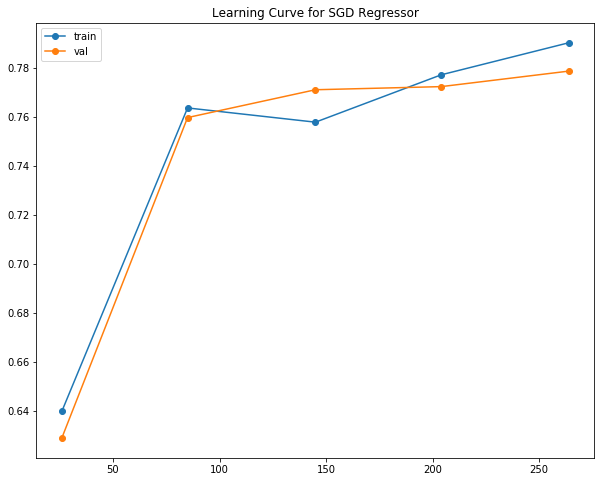

In [59]:
fig, ax = plt.subplots(figsize=(10, 8))

# plot number of samples vs. mean train scores
ax.plot(train_sizes_abs, train_scores.mean(axis=1), label='train', marker='o')

# plot number of samples vs. mean val scores
ax.plot(train_sizes_abs, val_scores.mean(axis=1), label='val', marker='o')

ax.legend()
ax.set_title('Learning Curve for SGD Regressor')
plt.show()

## Deployment and Prediction

Inventory (what's needed for prediction):
1. Scaler for X: use for scaling inputs before passing to model
2. Model: use for getting the prediction
3. Scaler for y: use for converting raw predictions to actual values

In [66]:
# save model for later use
import pickle

pickle.dump(X_scaler, open('01_autompg_X_scaler.pickle', 'wb'))
pickle.dump(y_scaler, open('01_autompg_y_scaler.pickle', 'wb'))
pickle.dump(model, open('01_autompg_model.pickle', 'wb'))

In [75]:
# load model in deployment

X_scaler1 = pickle.load(open('01_autompg_X_scaler.pickle', 'rb'))
y_scaler1 = pickle.load(open('01_autompg_y_scaler.pickle', 'rb'))
model1 = pickle.load(open('01_autompg_model.pickle', 'rb'))

# imagine we have test data
test_data = X_test[:10]
test_targets = y_test[:10]

Z_test_data = X_scaler1.transform(test_data)
y_test_pred = y_scaler.inverse_transform(model1.predict(Z_test_data).reshape(-1, 1))

print('Truth', test_targets.values)
print('Predictions', y_test_pred.flatten())

Truth [26.  21.6 36.1 26.  27.  28.  13.  26.  19.  29. ]
Predictions [26.6408165  27.0329776  31.83635715 26.48734523 30.17371472 29.09622948
  9.33317078 29.2618256  21.69315388 29.02127819]


C:\Users\issohl\AppData\Local\conda\conda\envs\mldds03\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


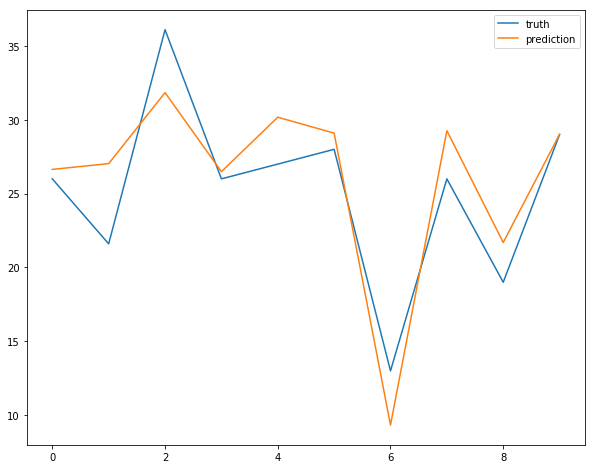

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(test_targets.values, label='truth')
ax.plot(y_test_pred, label='prediction')
ax.legend()